# Time Series vs Supervised Learning

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt

# Zadanie
Wczytaj dane "Monthly Car Sales Dataset", które pisują liczbę sprzedanych samochodów w Quebec, Kanada w latach 1960 i 1968.

In [3]:
series = Series.from_csv('./daily-minimum-temperatures.csv', header=0)
series.head()

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

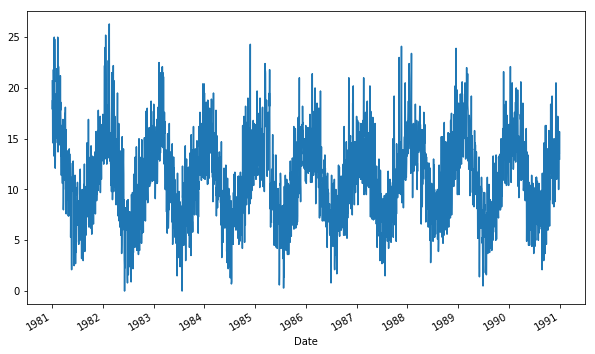

In [4]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [5]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [6]:
series.values

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ])

In [7]:
df = pd.DataFrame()
df['t'] = [x for x in series]
dataframe = series_to_supervised(df, 15)
dataframe.head()

,var1(t-15),var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
15,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0,20.7
16,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0,20.7,20.6
17,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0,20.7,20.6,24.8
18,14.6,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0,20.7,20.6,24.8,17.7
19,15.8,15.8,15.8,17.4,21.8,20.0,16.2,13.3,16.7,21.5,25.0,20.7,20.6,24.8,17.7,15.5


# Zadanie
Proszę wybrać optymalną metodę regresji do powyższych danych.

  * prosze podzielić zbiór danych na czść treningową i testową
  * proszę za pomoca cross validat-cji dobrać optymalne parametry
  * proszę wypisać zbiorcza tabelę z wynikami względem miar
    * explained_variance_score
    * mean_absolute_error
    * mean_squared_error
    * median_absolute_error
    * r2
  * Proszę użyć  
    * ElasticNet sklearn.linear_model.ElasticNet
    * Lasso sklearn.linear_model.Lasso
    * Ridge sklearn.linear_model.Ridge
    * LR sklearn.linear_model.LinearRegression
    * SVR sklearn.svm.SVR
    * RFR sklearn.ensemble.RandomForestRegressor
    * MLP_R sklearn.neural_network.MLPRegressor 

In [8]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

,Method,explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2
0,SVR,0.691491,2189.672367,6.423198e+06,1981.392841,0.688239
1,RFR,0.789926,1741.107368,4.354664e+06,1597.760000,0.788639
2,MLP_R,0.504583,2453.407114,1.044602e+07,1697.217933,0.492985
